<a href="https://colab.research.google.com/github/Akshara416/OpenCV-projects/blob/master/cricket_shot_analysis/Bat_and_Ball_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Bat Detection

In [ ]:
! git clone https://github.com/gtmray/cricket-shots.git
! cd cricket-shots && pip install -r requirements.txt

Cloning into 'cricket-shots'...
remote: Enumerating objects: 3986, done.
remote: Counting objects: 100% (3986/3986), done.
remote: Compressing objects: 100% (3902/3902), done.
remote: Total 3986 (delta 112), reused 3900 (delta 57), pack-reused 0
Receiving objects: 100% (3986/3986), 116.41 MiB | 33.67 MiB/s, done.
Resolving deltas: 100% (112/112), done.
Checking out files: 100% (3781/3781), done.


In [ ]:
pip install -r /content/drive/MyDrive/Cricket_shots_analysis/Code/bat_requirements.txt

In [ ]:
import sys
sys.path.insert(0,'/content/drive/MyDrive/Cricket_shots_analysis/')

In [ ]:
from predict_bat import predict_bat

## Extracting only label and prob of prediction

Detections: 

[Detection(bounding_box=Rect(left=-5, top=23, right=517, bottom=326), categories=[Category(label='bat', score=0.96484375, index=0)])]


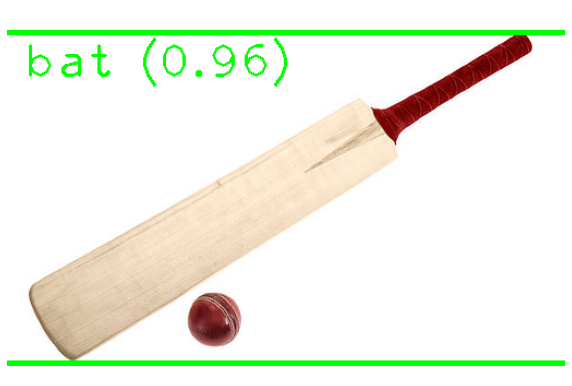

In [ ]:
det = predict_bat('/content/drive/MyDrive/Cricket_shots_analysis/images/bat_images/bat_1.jpg')

Detections: 

[Detection(bounding_box=Rect(left=211, top=19, right=312, bottom=98), categories=[Category(label='bat', score=0.9375, index=0)])]


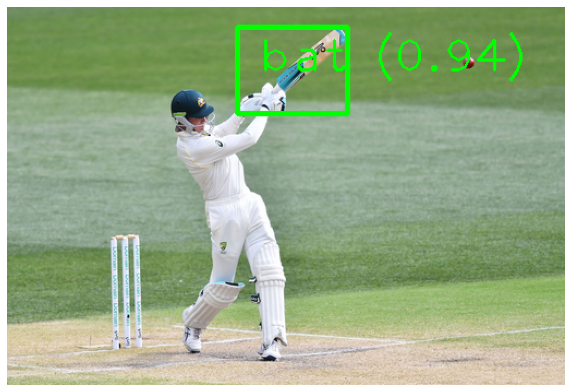

In [ ]:
det = predict_bat('/content/drive/MyDrive/Cricket_shots_analysis/images/bat_images/bat_4.jpg')

Detections: 

[Detection(bounding_box=Rect(left=58, top=1, right=103, bottom=71), categories=[Category(label='bat', score=0.87109375, index=0)])]


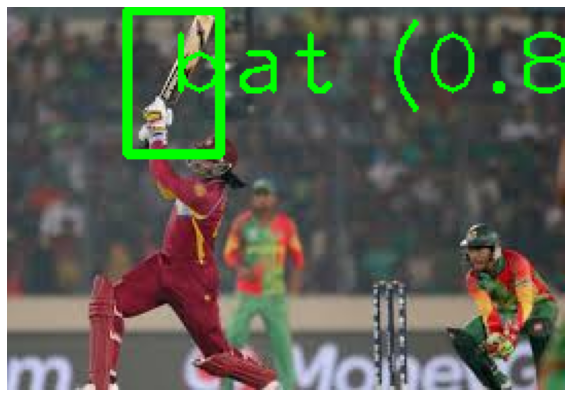

In [ ]:
det = predict_bat('/content/drive/MyDrive/Cricket_shots_analysis/images/bat_images/bat_6.jpg')

In [ ]:
for detection in det:
  category = detection.categories[0]        
  label = category.label
  probability = round(category.score, 2)
  print(label)
  print(probability)

bat
0.93


In [ ]:
det[0]

Detection(bounding_box=Rect(left=-4, top=97, right=459, bottom=246), categories=[Category(label='bat', score=0.92578125, index=0)])

In [ ]:
category = det[0].categories[0]        
label = category.label
probability = round(category.score, 2)
print(label)
print(probability)

bat
0.93


# **Ball Detection**

In [64]:
## Code for later reference
!# git clone https://github.com/haiiamnikhil/balldetection.git
## Downloading youtube video
#!pip install -q youtube-dl
#from IPython.display import YouTubeVideo
#Sample ball videos - Zs6sMEGmGmo, 
#YOUTUBE_ID = 'WLlK1LRj7aI'
#YouTubeVideo(YOUTUBE_ID)
#!rm -rf youtube.mp4
# download the youtube with the given ID https://www.youtube.com/watch?v=Zs6sMEGmGmo
#!youtube-dl -f 'bestvideo[ext=mp4]' --output "youtube.%(ext)s" https://www.youtube.com/watch?v=$YOUTUBE_ID
# cut the first 10 seconds
#video = '/content/drive/MyDrive/Cricket_shots_analysis/videos/balls_2.mp4'
#!ffmpeg -y -loglevel info -i $video -t 20 '/content/drive/MyDrive/Cricket_shots_analysis/videos/balls_sample_2.mp4'
#!pip install opencv-contrib-python==3.4.13.47 --force-reinstall

In [91]:
pwd

'/content'

In [3]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15412, done.
remote: Total 15412 (delta 0), reused 0 (delta 0), pack-reused 15412
Receiving objects: 100% (15412/15412), 14.04 MiB | 18.02 MiB/s, done.
Resolving deltas: 100% (10356/10356), done.


In [4]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/darknet


In [5]:
pwd

'/content/darknet'

In [ ]:
!make

In [ ]:
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights

In [8]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
def imShow(path):
  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)
  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

In [ ]:
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights data/person.jpg

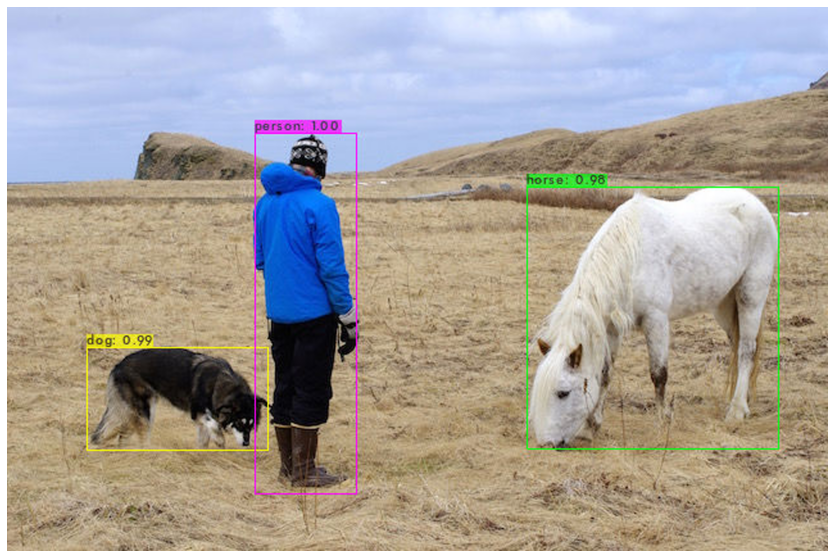

In [10]:
imShow('predictions.jpg')

In [11]:
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights data/dog.jpg

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv  

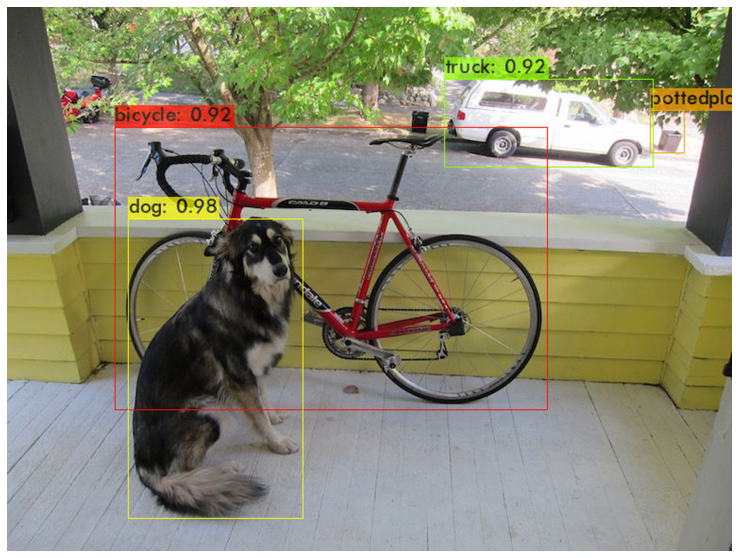

In [12]:
imShow('predictions.jpg')

In [ ]:
!./darknet detector demo cfg/coco.data cfg/yolov4.cfg yolov4.weights -dont_show /content/drive/MyDrive/Cricket_shots_analysis/videos/balls_2.mp4 -i 0 -out_filename results.avi

In [25]:
cd /content

/content


In [26]:
!git clone https://github.com/taipingeric/yolo-v4-tf.keras.git

Cloning into 'yolo-v4-tf.keras'...
remote: Enumerating objects: 1383, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 1383 (delta 2), reused 0 (delta 0), pack-reused 1377
Receiving objects: 100% (1383/1383), 29.83 MiB | 27.13 MiB/s, done.
Resolving deltas: 100% (716/716), done.


In [27]:
cd /content/yolo-v4-tf.keras/

/content/yolo-v4-tf.keras


In [29]:
from models import Yolov4
model = Yolov4(weight_path='/content/drive/MyDrive/Cricket_shots_analysis/yolo/yolov4.weights', 
               class_name_path='class_names/coco_classes.txt')

nms iou: 0.413 score: 0.3
all weights read
load from /content/drive/MyDrive/Cricket_shots_analysis/yolo/yolov4.weights


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


img shape:  (406, 594, 3)
# of bboxes: 5


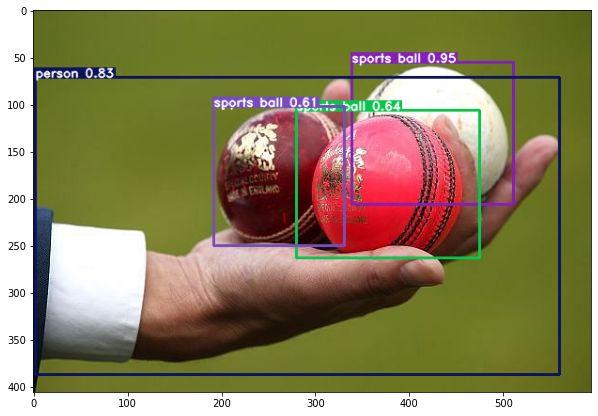

In [30]:
pred = model.predict('/content/drive/MyDrive/Cricket_shots_analysis/images/ball.jpg')

In [39]:
pred[(pred['class_name']=='sports ball') & (pred['score']>0.1)]

,x1,y1,x2,y2,class_name,score,w,h
0,339,55,511,206,sports ball,0.950449,172,151
3,280,106,475,263,sports ball,0.638718,195,157
4,192,102,331,250,sports ball,0.612029,139,148
